In [10]:
import numpy as np
import matplotlib.pyplot as plt

def euler_solver(f, x0, y0, x_end, h):
    y0 = np.array(y0, dtype=float)

    N = int((x_end - x0) / h)
    x = np.zeros(N + 1)
    y = np.zeros((N + 1, y0.size))

    x[0] = x0
    y[0] = y0

    for n in range(N):
        y[n+1] = y[n] + h * f(x[n], y[n])
        x[n+1] = x[n] + h

    return x, y



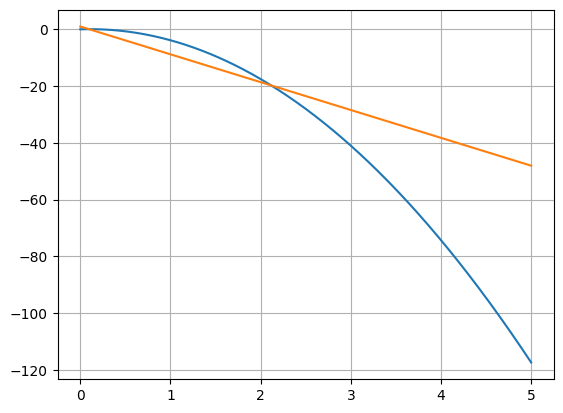

In [12]:
def motion(t, y):
    x, v = y
    return np.array([v, -9.81])

t, Y = euler_solver(
    motion,
    x0=0,
    y0=[0, 1],   # x(0)=0, v(0)=1
    x_end=5,
    h=0.01
)


plt.plot(t,Y)
plt.grid(True)



alpha = 0.3999999999999999


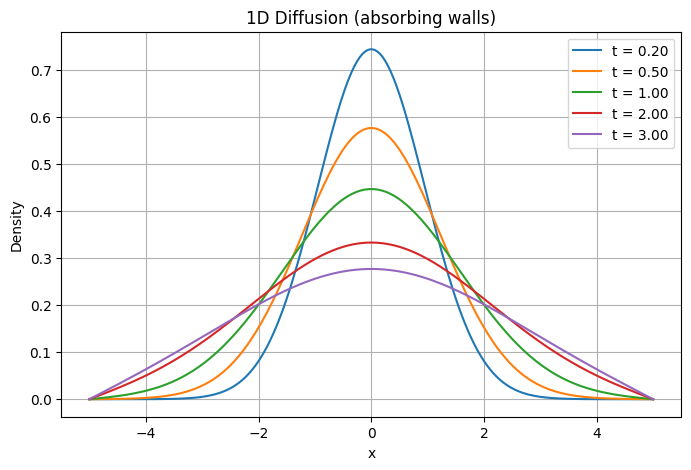

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



D = 1.0
L = 10.0
Nx = 201
dx = L / (Nx - 1)

dt = 0.001


t_plot = np.array([0.2, 0.5, 1.0, 2.0, 3.0])

n_plot = (t_plot / dt).round().astype(int)
Nt = n_plot.max() + 1    # run long enough to reach last plot time

alpha = D * dt / dx**2
print("alpha =", alpha)  # must be <= 0.5



x = np.linspace(-L/2, L/2, Nx)



rho = np.exp(-x**2)
rho_new = rho.copy()

 
#bc_type = "reflective"
bc_type = "absorbing"



plt.figure(figsize=(8, 5))

plot_index = 0

for n in range(Nt):


    for i in range(1, Nx - 1):
        rho_new[i] = rho[i] + alpha * (
            rho[i + 1] - 2 * rho[i] + rho[i - 1]
        )


    if bc_type == "reflective":
        rho_new[0]  = rho_new[1]
        rho_new[-1] = rho_new[-2]

    elif bc_type == "absorbing":
        rho_new[0]  = 0.0
        rho_new[-1] = 0.0


    rho[:] = rho_new[:]


    if plot_index < len(n_plot) and n == n_plot[plot_index]:
        plt.plot(x, rho, label=f"t = {n * dt:.2f}")
        plot_index += 1


plt.xlabel("x")
plt.ylabel("Density")
plt.title(f"1D Diffusion ({bc_type} walls)")
plt.legend()
plt.grid()
plt.show()


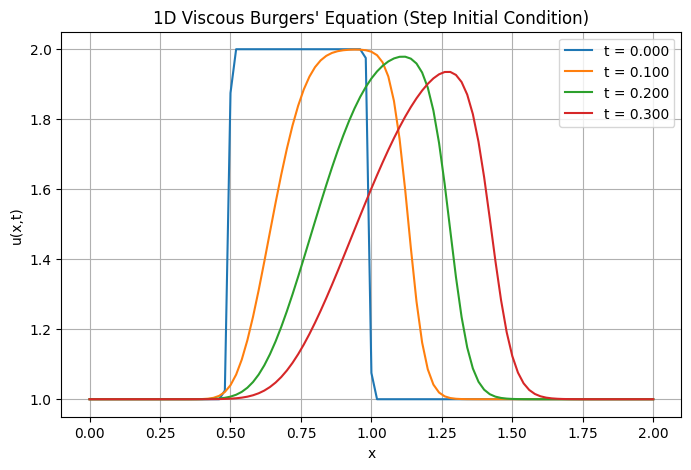

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


nx = 101            # number of spatial points
L = 2.0             # domain length
dx = L / (nx - 1)
x = np.linspace(0, L, nx)

nu = 0.01           # viscosity
dt = 0.001          # time step

# TIMES TO PLOT
t_plot = np.array([0,0.1,0.2,0.3])
n_plot = (t_plot / dt).round().astype(int)   # convert times to time-step indices

nt = n_plot.max() + 1                        # ensure simulation runs long enough


# INITIAL CONDITION

u = np.ones(nx)
u[int(nx/4):int(nx/2)] = 2.0   # step / shock
u_new = u.copy()


plt.figure(figsize=(8,5))

plot_index = 0
for n in range(nt):
    un = u.copy()
    
    # update interior points (finite difference)
    u_new[1:-1] = un[1:-1] - un[1:-1]*dt/dx*(un[1:-1]-un[0:-2]) \
                              + nu*dt*(un[2:] - 2*un[1:-1] + un[0:-2])/dx**2
    
    # boundary conditions (Dirichlet: u=1 at ends)
    u_new[0] = 1.0
    u_new[-1] = 1.0
    
    u[:] = u_new[:]
    
    # plot at requested times
    if plot_index < len(n_plot) and n == n_plot[plot_index]:
        plt.plot(x, u, label=f"t = {n*dt:.3f}")
        plot_index += 1


plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("1D Viscous Burgers' Equation (Step Initial Condition)")
plt.legend()
plt.grid()
plt.show()
